# TELECOM CHURN CASE STUDY ML-2
 ~ Arka Basu

- Business Understanding

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an <b> average of 15-25% annual churn rate</b>. Given the fact that <b>it costs 5-10 times more to acquire a new customer than to retain an existing one</b>, customer retention has now become even more important than customer acquisition.

 - <b>retaining high profitable</b> customers is the number one business goal.
 - To reduce customer churn, telecom companies need to predict <b>which customers are at high risk of churn</b>.
 - In this project, we need to analyse customer-level data of a leading telecom firm, build predictive models to <b>identify customers at high risk of churn</b> and <b>identify the main indicators of churn</b>.
    

### Understanding and defining Chrun

There is two main model in Telecom Industry - Prepaid and Postpaid
- Prepaid - Customers pay/recharge in Advance for the service
- Postpaid - Customers pay/recharge after usage of services on Monthly/yearly basis

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply<b> stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again)</b>.

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

# Data understanding 

In [1]:
#Importing Required Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Loading data into dataframe
telecom = pd.read_csv("telecom_churn_data.csv",sep=',')

In [3]:
# No ... during display : Show all
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(telecom.head())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom.shape

(99999, 226)

Data contains 226 columns

In [5]:
# Getting Column list for given dataset
list(telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [6]:
# Is there any duplicate mobile number ?
len(telecom.mobile_number)

99999

##### Missing Values Treatment

In [7]:
# Null Columns Percentage of null values
round(100*telecom.isnull().sum()/len(telecom.index),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [8]:
# Number of columns having Null values
(telecom.isnull().sum()!=0).sum()

166

Hence, 166 columns are having Null values, while rest 60 columns are not having any Missing values

av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9 containing high number of null values.
Imputing these columns with 0

In [9]:
telecom['av_rech_amt_data_6']=telecom['av_rech_amt_data_6'].fillna(0)
telecom['av_rech_amt_data_7']=telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_8']=telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_9']=telecom['av_rech_amt_data_9'].fillna(0)

In [10]:
telecom['av_rech_amt_data_6']

0         252.00
1           0.00
2           0.00
3           0.00
4          56.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13          0.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19        154.00
20          0.00
21          0.00
22          0.00
23          0.00
24          0.00
25          0.00
26          0.00
27          0.00
28          0.00
29          0.00
30          0.00
31          0.00
32         64.00
33       1057.00
34          0.00
35          0.00
36          0.00
37          0.00
38          0.00
39        154.00
40          0.00
41          0.00
42          0.00
43          0.00
44        154.00
45          0.00
46          0.00
47        274.00
48          0.00
49          0.00
50          0.00
51          0.00
52        198.00
53         86.00
54          0.00
55         14.00
56        308.00
57       1311.00
58          0.

We need to calculate total data recharge amnt by multiplying avg recharge amnt * amg no of recharges

In [11]:
telecom["total_data_amt_6"] = telecom["total_rech_data_6"].fillna(0) * telecom['av_rech_amt_data_6']
telecom["total_data_amt_7"] = telecom["total_rech_data_7"].fillna(0) * telecom['av_rech_amt_data_7']
telecom["total_data_amt_8"] = telecom["total_rech_data_8"].fillna(0) * telecom['av_rech_amt_data_8']
telecom["total_data_amt_9"] = telecom["total_rech_data_9"].fillna(0) * telecom['av_rech_amt_data_9']

In [12]:
telecom['total_data_amt_6']

0           252.00
1             0.00
2             0.00
3             0.00
4            56.00
5             0.00
6             0.00
7             0.00
8             0.00
9             0.00
10            0.00
11            0.00
12            0.00
13            0.00
14            0.00
15            0.00
16            0.00
17            0.00
18            0.00
19          154.00
20            0.00
21            0.00
22            0.00
23            0.00
24            0.00
25            0.00
26            0.00
27            0.00
28            0.00
29            0.00
30            0.00
31            0.00
32          192.00
33         5285.00
34            0.00
35            0.00
36            0.00
37            0.00
38            0.00
39          154.00
40            0.00
41            0.00
42            0.00
43            0.00
44          154.00
45            0.00
46            0.00
47          274.00
48            0.00
49            0.00
50            0.00
51            0.00
52          

In [13]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Now Imputing for missing values for Calling Recharge amnt

In [14]:
telecom['total_rech_amt_6']=telecom['total_rech_amt_6'].fillna(0)
telecom['total_rech_amt_7']=telecom['total_rech_amt_7'].fillna(0)
telecom['total_rech_amt_8']=telecom['total_rech_amt_8'].fillna(0)
telecom['total_rech_amt_9']=telecom['total_rech_amt_9'].fillna(0)

In [15]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

#### Filtering High Value Customers
Average data and call recharge amnt were in top 70 percentile during 6th and 7th month ( good months )

In [16]:
# Monthly average Data and Call recharge amount during Good months
telecom['goodmonth_avg_recharge'] = ((telecom['total_rech_amt_6']+telecom['total_data_amt_6'])+(telecom['total_rech_amt_7']+telecom['total_data_amt_7'])/2)
telecom['goodmonth_avg_recharge'].head()

0    866.0
1    343.0
2    325.5
3    385.0
4    427.0
Name: goodmonth_avg_recharge, dtype: float64

In [17]:
# Now Calculating the 70 th percentile
perc70=np.percentile(telecom['goodmonth_avg_recharge'],70.0)
perc70

715.0

In [18]:
#Filtering HVC
telecom_HVC = telecom[telecom['goodmonth_avg_recharge']>=perc70]
telecom_HVC.shape
# It should be around 30K

(30014, 231)

#### Tagging Churnned Customers

Customers who did not use data/call in 9th month are churnned people

In [19]:
# Creating one function for returning churn as 1
def ChurnFlg(x):
    if((x['total_og_mou_9']==0) & (x['vol_2g_mb_9']==0) & (x['vol_3g_mb_9']==0) & (x['total_ic_mou_9']==0)):
        return 1
    else:
        return 0

In [20]:
# First imputing 0 to all columns
telecom_HVC['Churn'] = telecom_HVC.apply(ChurnFlg,axis=1)
telecom_HVC.head()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00           0.00   
16            0.0           0.00          17.74           0.00           0.00   
17            0.0           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

#### Therefore my Target Column is ready : Churn

In [21]:
# Now dropping all columns for 9th month
to_drop=[]
for i in range(0,len(telecom_HVC.columns)):
    if(telecom_HVC.columns[i].endswith('_9')):
        to_drop.append(telecom_HVC.columns[i])
#to_drop
telecom_HVC = telecom_HVC.drop(to_drop,axis=1)
telecom_HVC.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
16        215.64    

In [22]:
telecom_HVC.shape

(30014, 177)

In [23]:
# Ignoring below Columns as explained in the video session:
to_drop=[]
for i in range(0,len(telecom_HVC.columns)):
    if(telecom_HVC.columns[i].startswith('last_date')):
        to_drop.append(telecom_HVC.columns[i])
#to_drop
telecom_HVC = telecom_HVC.drop(to_drop,axis=1)
telecom_HVC.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803          NaN          NaN         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN           NaN          0.00            NaN            NaN   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
17          

In [24]:
telecom_HVC.shape

(30014, 174)

In [25]:
telecom_HVC.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.001400e+04    30014.0         29777.0         29777.0   
mean    7.001205e+09      109.0             0.0             0.0   
std     6.903109e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000611e+09      109.0             0.0             0.0   
50%     7.001201e+09      109.0             0.0             0.0   
75%     7.001800e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29777.0  30014.000000  30014.000000  30014.000000  29532.000000   
mean              0.0    571.268549    546.020545    498.277119    272.848505   
std               0.0    454.262152    484.752186    502.518042    466.126955   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    332.346000    288.672750    218.804000     20.890000   
50%               0.0    494.964500    464.564500    417.274500     93.150000   
75%               0.0    703.557000    687.919000    652.011500    310.575000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29368.000000  28655.000000  29532.000000  29368.000000  28655.000000   
mean     265.178905    238.464655    388.718375    375.651382    341.764025   
std      478.273980    460.069278    485.181679    496.856448    478.971177   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.540000     13.750000     84.080000     72.260000     56.260000   
50%       83.785000     71.090000    239.000000    218.975000    191.680000   
75%      287.002500    247.185000    506.392500    487.237500    446.385000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29532.000000   29368.000000   28655.000000   29532.000000   
mean       16.625531      12.838840      12.980495      27.688271   
std        79.137970      75.686619      75.312788     118.253935   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29368.000000   28655.000000      29532.000000      29368.000000   
mean       20.420362      20.628880         87.491560         86.634520   
std        96.323255     106.425429        233.410809        245.173613   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.440000          4.980000   
50%         0.000000       0.000000         26.630000         25.060000   
75%         0.000000       0.000000         81.145000         79.245000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28655.000000      29532.000000      29368.000000      28655.000000   
mean          80.820878        168.359998        163.949068        157.008331   
std          232.847731        251.651253        242.134995        236.545265   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.705000         22.590000         21.555000         16.780000   
50%           22.880000         82.535000         80.180000         73.630000   
75%           75.190000        216.465000        209.495000        204.080000   
max        1075

In [26]:
# Columns which are having no change in values need to be dropped
to_drop=['circle_id','std_og_t2o_mou','loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_8','std_og_t2c_mou_7','std_ic_t2o_mou_6',
        'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
telecom_HVC = telecom_HVC.drop(to_drop,axis=1)
telecom_HVC.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16          

In [27]:
telecom_HVC.shape

(30014, 164)

In [28]:
# Now checking rest of null Columns percentage
round(100*telecom_HVC.isnull().sum()/len(telecom_HVC.index),2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.61
onnet_mou_7                  2.15
onnet_mou_8                  4.53
offnet_mou_6                 1.61
offnet_mou_7                 2.15
offnet_mou_8                 4.53
roam_ic_mou_6                1.61
roam_ic_mou_7                2.15
roam_ic_mou_8                4.53
roam_og_mou_6                1.61
roam_og_mou_7                2.15
roam_og_mou_8                4.53
loc_og_t2t_mou_6             1.61
loc_og_t2t_mou_7             2.15
loc_og_t2t_mou_8             4.53
loc_og_t2m_mou_6             1.61
loc_og_t2m_mou_7             2.15
loc_og_t2m_mou_8             4.53
loc_og_t2f_mou_6             1.61
loc_og_t2f_mou_7             2.15
loc_og_t2f_mou_8             4.53
loc_og_t2c_mou_6             1.61
loc_og_t2c_mou_7             2.15
loc_og_t2c_mou_8             4.53
loc_og_mou_6                 1.61
loc_og_mou_7  

In [29]:
# Removing last date columns which are not meaning anything
to_drop=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
        'date_of_last_rech_data_8']
telecom_HVC = telecom_HVC.drop(to_drop,axis=1)
telecom_HVC.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16          

In [30]:
telecom_HVC.shape

(30014, 158)

In [31]:
telecom['onnet_mou_6'].isnull().sum()

3937

In [32]:
telecom_HVC.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16          

In [33]:
# Imputing rest of the columns with 0
for i in telecom_HVC.columns:
    if (telecom_HVC[i].isnull().sum()>0):
        telecom_HVC[i]=telecom_HVC[i].fillna(0)

In [34]:
telecom_HVC.isnull().sum()

mobile_number             0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6               0
onnet_mou_7               0
onnet_mou_8               0
offnet_mou_6              0
offnet_mou_7              0
offnet_mou_8              0
roam_ic_mou_6             0
roam_ic_mou_7             0
roam_ic_mou_8             0
roam_og_mou_6             0
roam_og_mou_7             0
roam_og_mou_8             0
loc_og_t2t_mou_6          0
loc_og_t2t_mou_7          0
loc_og_t2t_mou_8          0
loc_og_t2m_mou_6          0
loc_og_t2m_mou_7          0
loc_og_t2m_mou_8          0
loc_og_t2f_mou_6          0
loc_og_t2f_mou_7          0
loc_og_t2f_mou_8          0
loc_og_t2c_mou_6          0
loc_og_t2c_mou_7          0
loc_og_t2c_mou_8          0
loc_og_mou_6              0
loc_og_mou_7              0
loc_og_mou_8              0
std_og_t2t_mou_6          0
std_og_t2t_mou_7          0
std_og_t2t_mou_8          0
std_og_t2m_mou_6          0
std_og_t2m_mou_7    

##### Checking the outliers 

In [35]:
# Are datatypes okay
telecom_HVC.dtypes

mobile_number               int64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_og_t2t_mou_8          float64
loc_og_t2m_mou_6          float64
loc_og_t2m_mou_7          float64
loc_og_t2m_mou_8          float64
loc_og_t2f_mou_6          float64
loc_og_t2f_mou_7          float64
loc_og_t2f_mou_8          float64
loc_og_t2c_mou_6          float64
loc_og_t2c_mou_7          float64
loc_og_t2c_mou_8          float64
loc_og_mou_6              float64
loc_og_mou_7  

In [36]:
# Perfect ! Setting the outliers
telecom_HVC.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.001400e+04  30014.000000  30014.000000  30014.000000  30014.000000   
mean    7.001205e+09    571.268549    546.020545    498.277119    268.466784   
std     6.903109e+05    454.262152    484.752186    502.518042    463.639258   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000611e+09    332.346000    288.672750    218.804000     18.845000   
50%     7.001201e+09    494.964500    464.564500    417.274500     89.675000   
75%     7.001800e+09    703.557000    687.919000    652.011500    303.950000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30014.000000  30014.000000  30014.000000  30014.000000  30014.000000   
mean     259.471382    227.667245    382.475880    367.566129    326.289336   
std      474.661414    452.258582    483.744219    494.494431    473.365458   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.032500      9.430000     77.987500     65.017500     42.160000   
50%       79.150000     62.840000    232.970000    210.560000    175.750000   
75%      279.047500    231.667500    499.542500    477.910000    429.505000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30014.000000   30014.000000   30014.000000   30014.000000   
mean       16.358539      12.562505      12.392753      27.243620   
std        78.527747      74.890830      73.637415     117.352156   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30014.000000   30014.000000      30014.000000      30014.000000   
mean       19.980848      19.694828         86.086518         84.769860   
std        95.327059     104.076444        231.790039        242.846376   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.840000          4.210000   
50%         0.000000       0.000000         25.530000         23.690000   
75%         0.000000       0.000000         79.537500         76.987500   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30014.000000      30014.000000      30014.000000      30014.000000   
mean          77.161400        165.656276        160.420345        149.899171   
std          228.134677        250.517907        240.693820        233.421833   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.200000         20.760000         18.880000         11.830000   
50%           19.940000         79.820000         76.525000         65.880000   
75%           70.710000        212.160000        205.292500        194.187500   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30014.000000      30014.000000      30014.000000      30014.000000   
mean           6.427280          6.359588          5.845309          1.600459   
std           22.200774         21.909896         19.496498          6.272347   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.010000          0.000000          0.000000 

#### We can see that there is significant difference between recharges and usages for 6th,7th and 8th month ie good and action months
- Hence, we will create new variable which captures these differences

In [37]:
telecom_HVC.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30014 entries, 0 to 99998
Data columns (total 158 columns):
mobile_number             int64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_og_t2t_mou_8          float64
loc_og_t2m_mou_6          float64
loc_og_t2m_mou_7          float64
loc_og_t2m_mou_8          float64
loc_og_t2f_mou_6          float64
loc_og_t2f_mou_7          float64
loc_og_t2f_mou_8          float64
loc_og_t2c_mou_6          float64
loc_og_t

In [38]:
# As per video discussion, 8th month is the action Month where customers start to face 

telecom_HVC['total_rech_num_chnge_8_67'] = telecom_HVC.total_rech_num_8 - ((telecom_HVC.total_rech_num_6 + telecom_HVC.total_rech_num_7)/2)
telecom_HVC['total_rech_amt_chnge_8_67'] = telecom_HVC.total_rech_amt_8 - ((telecom_HVC.total_rech_amt_6 + telecom_HVC.total_rech_amt_7)/2)
telecom_HVC['max_rech_amt_chnge_8_67'] = telecom_HVC.max_rech_amt_8 - ((telecom_HVC.max_rech_amt_6 + telecom_HVC.max_rech_amt_7)/2)

telecom_HVC['total_rech_data_chnge_8_67'] = telecom_HVC.total_rech_data_8 - ((telecom_HVC.total_rech_data_6 + telecom_HVC.total_rech_data_7)/2)
telecom_HVC['max_rech_data_chnge_8_67'] = telecom_HVC.max_rech_data_8 - ((telecom_HVC.max_rech_data_6 + telecom_HVC.max_rech_data_7)/2)
telecom_HVC['av_rech_amt_data_chnge_8_67'] = telecom_HVC.av_rech_amt_data_8 - ((telecom_HVC.av_rech_amt_data_6 + telecom_HVC.av_rech_amt_data_7)/2)
telecom_HVC['arpu_chnge_8_67'] = telecom_HVC.arpu_8 - ((telecom_HVC.arpu_6 + telecom_HVC.arpu_7)/2)


In [39]:
# Also MOU columns
telecom_HVC['onnet_mou_chnge_8_67'] = telecom_HVC.onnet_mou_8 - ((telecom_HVC.onnet_mou_6 + telecom_HVC.onnet_mou_7)/2)
telecom_HVC['offnet_mou_chnge_8_67'] = telecom_HVC.offnet_mou_8 - ((telecom_HVC.offnet_mou_6 + telecom_HVC.offnet_mou_7)/2)
telecom_HVC['roam_ic_mou_chnge_8_67'] = telecom_HVC.roam_ic_mou_8 - ((telecom_HVC.roam_ic_mou_6 + telecom_HVC.roam_ic_mou_7)/2)
telecom_HVC['roam_og_mou_chnge_8_67'] = telecom_HVC.roam_og_mou_8 - ((telecom_HVC.roam_og_mou_6 + telecom_HVC.roam_og_mou_7)/2)

telecom_HVC['loc_og_mou_chnge_8_67'] = telecom_HVC.loc_og_mou_8 - ((telecom_HVC.loc_og_mou_6 + telecom_HVC.loc_og_mou_7)/2)
telecom_HVC['std_og_mou_chnge_8_67'] = telecom_HVC.std_og_mou_8 - ((telecom_HVC.std_og_mou_6 + telecom_HVC.std_og_mou_7)/2)
telecom_HVC['isd_og_mou_chnge_8_67'] = telecom_HVC.isd_og_mou_8 - ((telecom_HVC.isd_og_mou_6 + telecom_HVC.isd_og_mou_7)/2)
telecom_HVC['spl_og_mou_chnge_8_67'] = telecom_HVC.spl_og_mou_8 - ((telecom_HVC.spl_og_mou_6 + telecom_HVC.spl_og_mou_7)/2)

telecom_HVC['total_og_mou_chnge_8_67'] = telecom_HVC.total_og_mou_8 - ((telecom_HVC.total_og_mou_6 + telecom_HVC.total_og_mou_7)/2)
telecom_HVC['loc_ic_mou_chnge_8_67'] = telecom_HVC.loc_ic_mou_8 - ((telecom_HVC.loc_ic_mou_6 + telecom_HVC.loc_ic_mou_7)/2)
telecom_HVC['std_ic_mou_chnge_8_67'] = telecom_HVC.std_ic_mou_8 - ((telecom_HVC.std_ic_mou_6 + telecom_HVC.std_ic_mou_7)/2)
telecom_HVC['isd_ic_mou_chnge_8_67'] = telecom_HVC.isd_ic_mou_8 - ((telecom_HVC.isd_ic_mou_6 + telecom_HVC.isd_ic_mou_7)/2)

telecom_HVC['spl_ic_mou_chnge_8_67'] = telecom_HVC.spl_ic_mou_8 - ((telecom_HVC.spl_ic_mou_6 + telecom_HVC.spl_ic_mou_7)/2)
telecom_HVC['total_ic_mou_chnge_8_67'] = telecom_HVC.total_ic_mou_8 - ((telecom_HVC.total_ic_mou_6 + telecom_HVC.total_ic_mou_7)/2)

In [40]:
# Difference in data usages
telecom_HVC['vol_2g_mb_chnge_8_67'] = telecom_HVC.vol_2g_mb_8 - ((telecom_HVC.vol_2g_mb_6 + telecom_HVC.vol_2g_mb_7)/2)
telecom_HVC['vol_3g_mb_chnge_8_67'] = telecom_HVC.vol_3g_mb_8 - ((telecom_HVC.vol_3g_mb_6 + telecom_HVC.vol_3g_mb_7)/2)


# Visualize data

In [41]:
# Skewed variables 
telecom_HVC.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.001400e+04  30014.000000  30014.000000  30014.000000  30014.000000   
mean    7.001205e+09    571.268549    546.020545    498.277119    268.466784   
std     6.903109e+05    454.262152    484.752186    502.518042    463.639258   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000611e+09    332.346000    288.672750    218.804000     18.845000   
50%     7.001201e+09    494.964500    464.564500    417.274500     89.675000   
75%     7.001800e+09    703.557000    687.919000    652.011500    303.950000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30014.000000  30014.000000  30014.000000  30014.000000  30014.000000   
mean     259.471382    227.667245    382.475880    367.566129    326.289336   
std      474.661414    452.258582    483.744219    494.494431    473.365458   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.032500      9.430000     77.987500     65.017500     42.160000   
50%       79.150000     62.840000    232.970000    210.560000    175.750000   
75%      279.047500    231.667500    499.542500    477.910000    429.505000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30014.000000   30014.000000   30014.000000   30014.000000   
mean       16.358539      12.562505      12.392753      27.243620   
std        78.527747      74.890830      73.637415     117.352156   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30014.000000   30014.000000      30014.000000      30014.000000   
mean       19.980848      19.694828         86.086518         84.769860   
std        95.327059     104.076444        231.790039        242.846376   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.840000          4.210000   
50%         0.000000       0.000000         25.530000         23.690000   
75%         0.000000       0.000000         79.537500         76.987500   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30014.000000      30014.000000      30014.000000      30014.000000   
mean          77.161400        165.656276        160.420345        149.899171   
std          228.134677        250.517907        240.693820        233.421833   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.200000         20.760000         18.880000         11.830000   
50%           19.940000         79.820000         76.525000         65.880000   
75%           70.710000        212.160000        205.292500        194.187500   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30014.000000      30014.000000      30014.000000      30014.000000   
mean           6.427280          6.359588          5.845309          1.600459   
std           22.200774         21.909896         19.496498          6.272347   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.010000          0.000000          0.000000 

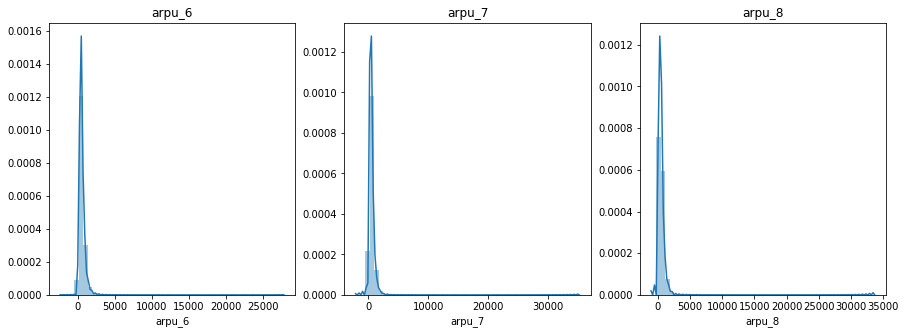

In [42]:
# arpu_6,arpu_7 and arpu_8
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('arpu_6')
sns.distplot(telecom_HVC['arpu_6'])

plt.subplot(132)
plt.title('arpu_7')
sns.distplot(telecom_HVC['arpu_7'])

plt.subplot(133)
plt.title('arpu_8')
sns.distplot(telecom_HVC['arpu_8'])

#### All are left Skewed :(

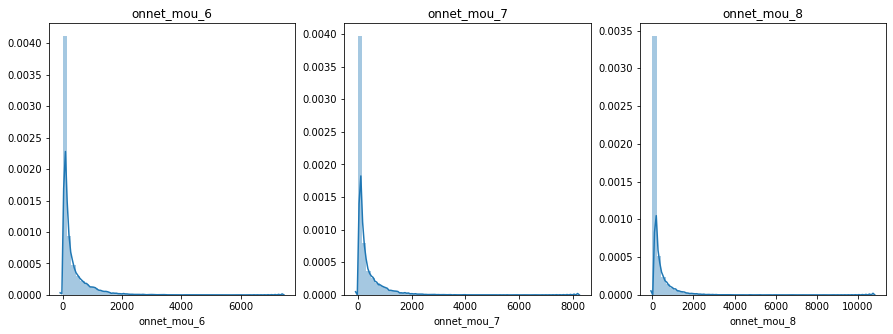

In [43]:
# onnet_mou_6, onnet_mou_7, onnet_mou_8
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('onnet_mou_6')
sns.distplot(telecom_HVC['onnet_mou_6'])

plt.subplot(132)
plt.title('onnet_mou_7')
sns.distplot(telecom_HVC['onnet_mou_7'])

plt.subplot(133)
plt.title('onnet_mou_8')
sns.distplot(telecom_HVC['onnet_mou_8'])

#### Left Skewed again

- From telecom_HVC.describe() we can see there is huge difference in all the numerical variables for 75% value and the max value

# Bivariate Analysis for few important columns

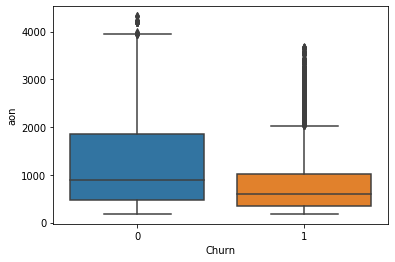

In [44]:
# aon : Age on Network or Since when using
sns.boxplot(telecom_HVC.Churn,telecom_HVC.aon)

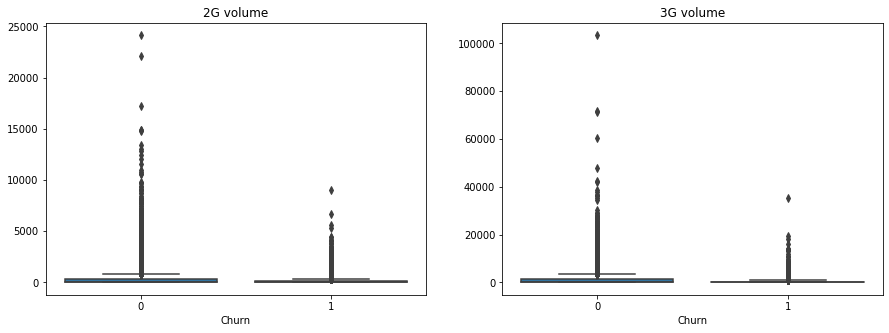

In [45]:
# Data Volume vs Churn
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('2G volume')
sns.boxplot(telecom_HVC.Churn,telecom_HVC.vol_2g_mb_6 + telecom_HVC.vol_2g_mb_7+telecom_HVC.vol_2g_mb_8)

plt.subplot(122)
plt.title('3G volume')
sns.boxplot(telecom_HVC.Churn,telecom_HVC.vol_3g_mb_6 + telecom_HVC.vol_3g_mb_7+telecom_HVC.vol_3g_mb_8)


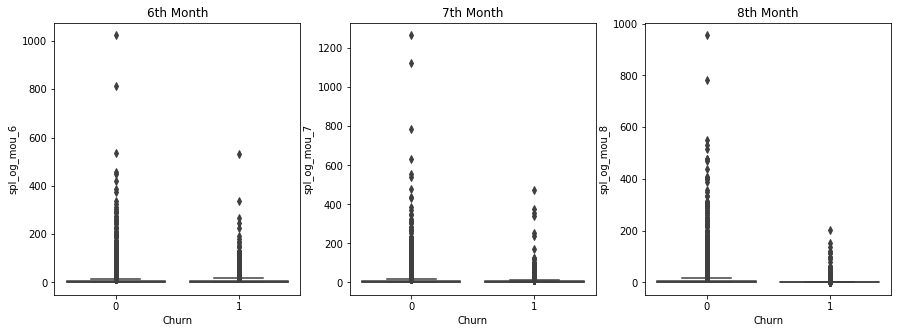

In [46]:
# Special Outgoing users 
# Data Volume vs Churn
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('6th Month')
sns.boxplot(telecom_HVC.Churn,telecom_HVC.spl_og_mou_6)

plt.subplot(132)
plt.title('7th Month')
sns.boxplot(telecom_HVC.Churn,telecom_HVC.spl_og_mou_7)

plt.subplot(133)
plt.title('8th Month')
sns.boxplot(telecom_HVC.Churn,telecom_HVC.spl_og_mou_8)

In [47]:
# It seems there is fairly a few churns in the total dataset
churn_cnt=telecom_HVC.Churn.value_counts()
churn_cnt

0    27372
1     2642
Name: Churn, dtype: int64

- Almost 9 times data are in not Churn

In [48]:
#import matplotlib.pyplot as plt
#
## Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#
#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#
#plt.show()

Text(0.5, 1.0, 'Churn Counts')

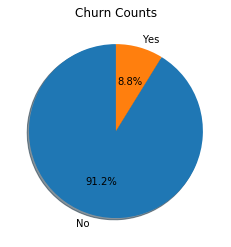

In [49]:
# Lets check percentage
churn_perc=telecom_HVC.Churn.value_counts()*100/len(telecom_HVC.index)
plt.pie(churn_perc,labels=['No','Yes'],autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Churn Counts')

- So, there is imbalance in data 

In [50]:
telecom_HVC.shape

(30014, 181)

In [51]:
telecom_HVC.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30014 entries, 0 to 99998
Data columns (total 181 columns):
mobile_number                  int64
arpu_6                         float64
arpu_7                         float64
arpu_8                         float64
onnet_mou_6                    float64
onnet_mou_7                    float64
onnet_mou_8                    float64
offnet_mou_6                   float64
offnet_mou_7                   float64
offnet_mou_8                   float64
roam_ic_mou_6                  float64
roam_ic_mou_7                  float64
roam_ic_mou_8                  float64
roam_og_mou_6                  float64
roam_og_mou_7                  float64
roam_og_mou_8                  float64
loc_og_t2t_mou_6               float64
loc_og_t2t_mou_7               float64
loc_og_t2t_mou_8               float64
loc_og_t2m_mou_6               float64
loc_og_t2m_mou_7               float64
loc_og_t2m_mou_8               float64
loc_og_t2f_mou_6               flo

In [52]:
# avg_rech_amt_data : these information are already captured in derived columns
telecom_HVC = telecom_HVC.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1)


In [53]:
# Also dropping mobile Number 
telecom_HVC = telecom_HVC.drop('mobile_number',axis=1)
telecom_HVC.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [54]:
# import required libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Modeling

### PCA

In [55]:
# Train - test Split
X = telecom_HVC.drop('Churn',axis=1)
Y = telecom_HVC.Churn
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,train_size=0.7,random_state=4)
print(X_TRAIN.shape)
print(X_TEST.shape)

(21009, 176)
(9005, 176)


In [56]:
# Training data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_TRAIN)
telecom_pca = pca.fit_transform(X_TRAIN)

In [57]:
# extract pca model from pipeline
pca = pca.named_steps['pca']
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.51
1       17.63
2       23.33
3       28.33
4       32.48
5       35.80
6       38.53
7       40.89
8       43.12
9       45.30
10      47.34
11      49.30
12      51.10
13      52.81
14      54.48
15      56.09
16      57.68
17      59.24
18      60.76
19      62.15
20      63.53
21      64.81
22      66.04
23      67.26
24      68.42
25      69.54
26      70.57
27      71.58
28      72.57
29      73.54
30      74.48
31      75.38
32      76.26
33      77.11
34      77.95
35      78.78
36      79.58
37      80.34
38      81.05
39      81.73
40      82.39
41      83.04
42      83.68
43      84.30
44      84.91
45      85.47
46      86.02
47      86.55
48      87.04
49      87.52
50      87.99
51      88.45
52      88.89
53      89.30
54      89.69
55      90.08
56      90.45
57      90.81
58      91.16
59      91.51
60      91.84
61      92.17
62      92.47
63      92.77
64      93.06
65      93.33
66      93.60
67      93.85
68      94.10
69      94.34
70      94.57
71    

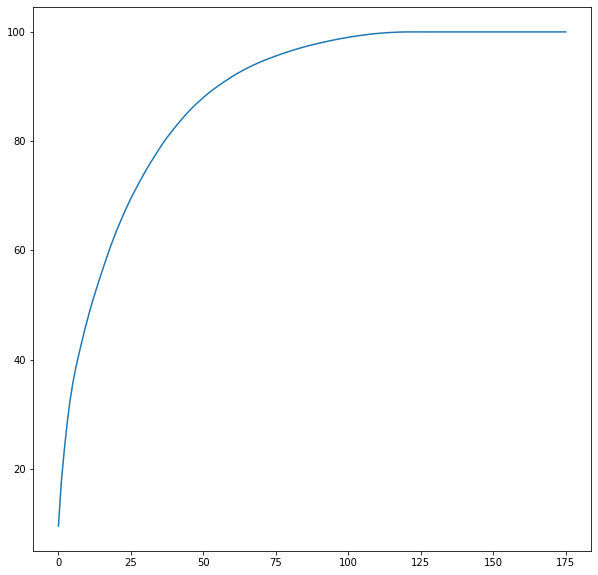

In [58]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100
plt.figure(figsize=(10,10))
plt.plot(cumulative_variance)

- Almost 55 variables explain nearly 90% variance

In [59]:
### Performing Logistic Regression on PCA compnments

In [60]:
vars_pca =55
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=vars_pca)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [61]:
# fit model
pipeline.fit(X_TRAIN, Y_TRAIN)

# check score on train data
pipeline.score(X_TRAIN, Y_TRAIN)

0.8224570422200009

#### Model Evaluation

In [62]:
Y_pred = pipeline.predict(X_TEST)

In [63]:
cm1 = confusion_matrix(Y_TEST, Y_pred)

In [64]:
#####from confusion matrix calculate accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.822765130483065
Sensitivity :  0.8213937621832359
Specificity :  0.8368883312421581


In [65]:
# We saw class imbalance in pie chart
logistic = LogisticRegression(class_weight={0:0.09, 1: 0.91})
# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)
#5 folds 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# GRIDSEARCHCV object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, n_jobs=-1, verbose=1)

# fit model
model.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           max_iter=100,
             

In [66]:
# cross validation results
pd.DataFrame(model.cv_results_)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.831196      0.020728         0.049999        0.006249   
1        2.271806      0.028979         0.050001        0.006251   
2        2.181187      0.052847         0.050000        0.006249   
3        2.874917      0.141485         0.050000        0.006252   
4        2.124936      0.258443         0.043751        0.006250   
5        2.818665      0.305954         0.049999        0.011693   
6        2.296808      0.169438         0.049999        0.006251   
7        3.162407      0.192023         0.046873        0.000005   
8        2.524924      0.531748         0.053125        0.007656   
9        3.556144      0.936514         0.065622        0.015309   
10       2.909287      0.308940         0.068748        0.012500   
11       3.703015      0.177598         0.074998        0.015307   
12       2.587424      0.512773         0.046872        0.000002   
13       3.637391      1.355194         0.053125        0.012500   
14       2.471800      0.207141         0.056249        0.007655   
15       3.081156      0.255672         0.059372        0.011692   
16       2.428053      0.570722         0.046875        0.000003   
17       4.059256      1.738256         0.056247        0.012499   
18       2.493676      0.266919         0.049998        0.006249   
19       3.174906      0.265782         0.049999        0.006251   
20       2.503053      0.600633         0.053123        0.007655   
21       4.115500      1.981289         0.056249        0.007654   
22       2.415553      0.244183         0.049999        0.006250   
23       3.159281      0.223470         0.056249        0.012499   
24       2.387430      0.465538         0.043750        0.011692   
25       4.312372      2.096299         0.053124        0.007654   
26       2.637421      0.406046         0.046876        0.000004   
27       3.437398      0.352020         0.053123        0.007655   
28       2.896790      0.473565         0.053123        0.007654   
29       4.677985      2.666548         0.050000        0.006249   
30       2.581173      0.504399         0.050000        0.006250   
31       2.984286      0.207517         0.046874        0.009881   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [67]:
# Cross Validation Results
print("AUC AREA: ", model.best_score_)
print("hyperparameters: ", model.best_params_)

AUC AREA:  0.832071969156076
hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [68]:
Y_pred = model.predict(X_TEST)

In [69]:
cm1 = confusion_matrix(Y_TEST, Y_pred)
cm1

array([[6801, 1407],
       [ 139,  658]], dtype=int64)

In [70]:
#####from confusion matrix calculate accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.828317601332593
Sensitivity :  0.8285818713450293
Specificity :  0.8255959849435383


## Random Forest

In [71]:
# random forest 
#- the class weight Handling 
randomForest = RandomForestClassifier(class_weight={0:0.08, 1: 0.92},n_jobs=-1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto','sqrt','log2']}

# 5 folds Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# gridsearch object
rf_model = GridSearchCV(estimator=randomForest, cv=folds, param_grid=params , n_jobs=-1, verbose=1)

In [72]:
# fit model
rf_model.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.08, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                              

In [73]:
# CV results
print("AUC AREA: ", rf_model.best_score_)
print("hyperparameters: ", rf_model.best_params_)

AUC AREA:  0.9404540911038126
hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt'}


In [74]:
# Test Data Prediction
Y_pred = model.predict(X_TEST)

In [75]:
cm1 = confusion_matrix(Y_TEST, Y_pred)
cm1

array([[6801, 1407],
       [ 139,  658]], dtype=int64)

In [76]:
#####from confusion matrix calculate accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.828317601332593
Sensitivity :  0.8285818713450293
Specificity :  0.8255959849435383


In [77]:
# Best max_features is sqrt
noFeatures = np.sqrt(len(X_TRAIN.columns))
print(noFeatures)

13.2664991614216


~13

In [78]:
rf_model_bst = RandomForestClassifier(n_estimators=100, 
                                  max_features=13, 
                                  class_weight={0:0.08, 1: 0.92}, 
                                  oob_score=True, random_state=4, verbose=1)
rf_model_bst.fit(X_TRAIN, Y_TRAIN)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.08, 1: 0.92},
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [79]:
Y_pred = rf_model_bst.predict(X_TEST)

cm1 = confusion_matrix(Y_TEST, Y_pred)
print(cm1)

#####from confusion matrix calculate accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8094  114]
 [ 397  400]]
Accuracy :  0.9432537479178235
Sensitivity :  0.9861111111111112
Specificity :  0.5018820577164367


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [80]:
imp_features = pd.DataFrame({'columns': X_TRAIN.columns , 'Priority' :rf_model_bst.feature_importances_*100})

In [81]:
imp_features.sort_values('Priority',ascending=False).reset_index()

index                      columns  Priority
0       65                 loc_ic_mou_8  6.305689
1       80               total_ic_mou_8  6.083022
2       17             loc_og_t2t_mou_8  3.882621
3       59             loc_ic_t2m_mou_8  3.808598
4       56             loc_ic_t2t_mou_8  3.318435
5      159              arpu_chnge_8_67  2.509754
6       29                 loc_og_mou_8  2.509260
7      101           last_day_rch_amt_8  2.417190
8       95             total_rech_amt_8  2.381811
9       53               total_og_mou_8  2.280022
10     154    total_rech_amt_chnge_8_67  2.033252
11      14                roam_og_mou_8  1.627128
12     173      total_ic_mou_chnge_8_67  1.568532
13     153    total_rech_num_chnge_8_67  1.496706
14     169        loc_ic_mou_chnge_8_67  1.442226
15      11                roam_ic_mou_8  1.372353
16     168      total_og_mou_chnge_8_67  1.362239
17     107              max_rech_data_8  1.319524
18       2                       arpu_8  1.287201
19      20             loc_og_t2m_mou_8  1.178866
20     162       roam_ic_mou_chnge_8_67  1.161923
21     163       roam_og_mou_chnge_8_67  1.057043
22      77                 std_ic_mou_8  1.002707
23     161        offnet_mou_chnge_8_67  0.932501
24     155      max_rech_amt_chnge_8_67  0.924784
25     165        std_og_mou_chnge_8_67  0.924626
26     116                  vol_2g_mb_8  0.912383
27     160         onnet_mou_chnge_8_67  0.870327
28       8                 offnet_mou_8  0.858415
29     170        std_ic_mou_chnge_8_67  0.843264
30      62             loc_ic_t2f_mou_8  0.829838
31      71             std_ic_t2m_mou_8  0.807915
32      41                 std_og_mou_8  0.762752
33      98               max_rech_amt_8  0.758634
34     104            total_rech_data_8  0.745149
35      92             total_rech_num_8  0.677237
36     144                          aon  0.638301
37      58             loc_ic_t2m_mou_7  0.633423
38      79               total_ic_mou_7  0.604877
39     119                  vol_3g_mb_8  0.590937
40     143                    fb_user_8  0.586345
41       1                       arpu_7  0.575072
42     164        loc_og_mou_chnge_8_67  0.558365
43     174         vol_2g_mb_chnge_8_67  0.526165
44     151             total_data_amt_8  0.524414
45      63                 loc_ic_mou_6  0.517551
46     167        spl_og_mou_chnge_8_67  0.516923
47      78               total_ic_mou_6  0.483139
48      57             loc_ic_t2m_mou_6  0.480717
49      64                 loc_ic_mou_7  0.468206
50     152       goodmonth_avg_recharge  0.465648
51      94             total_rech_amt_7  0.455843
52      68             std_ic_t2t_mou_8  0.439407
53       0                       arpu_6  0.432785
54     157     max_rech_data_chnge_8_67  0.432738
55      28                 loc_og_mou_7  0.427440
56      55             loc_ic_t2t_mou_7  0.422509
57      93             total_rech_amt_6  0.422473
58      35             std_og_t2m_mou_8  0.419302
59       5                  onnet_mou_8  0.415418
60      54             loc_ic_t2t_mou_6  0.406206
61      91             total_rech_num_7  0.405766
62      19             loc_og_t2m_mou_7  0.404262
63      18             loc_og_t2m_mou_6  0.403920
64       6                 offnet_mou_6  0.400471
65      51               total_og_mou_6  0.398001
66      34             std_og_t2m_mou_7  0.397504
67       7                 offnet_mou_7  0.394808
68     175         vol_3g_mb_chnge_8_67  0.393016
69      27                 loc_og_mou_6  0.391959
70      90             total_rech_num_6  0.389258
71      52               total_og_mou_7  0.383543
72      39                 std_og_mou_6  0.362498
73       3                  onnet_mou_6  0.361093
74      23             loc_og_t2f_mou_8  0.357234
75      16             loc_og_t2t_mou_7  0.354660
76      96               max_rech_amt_6  0.353209
77       4                  onnet_mou_7  0.339452
78      31             std_og_t2t_mou_7  0.334318
79   

# Creating final Model with top 20 features 

In [82]:
x_train= X_TRAIN[['loc_ic_mou_8','total_ic_mou_8','loc_og_t2t_mou_8','loc_ic_t2t_mou_8','arpu_chnge_8_67','loc_og_mou_8',
                  'last_day_rch_amt_8','total_rech_amt_8','total_og_mou_8','total_rech_amt_chnge_8_67','roam_og_mou_8',
                  'total_ic_mou_chnge_8_67','total_rech_num_chnge_8_67','loc_ic_mou_chnge_8_67','roam_ic_mou_8',
                  'total_og_mou_chnge_8_67','max_rech_data_8','arpu_8','loc_og_t2m_mou_8','roam_ic_mou_chnge_8_67']]
x_test =X_TEST[['loc_ic_mou_8','total_ic_mou_8','loc_og_t2t_mou_8','loc_ic_t2t_mou_8','arpu_chnge_8_67','loc_og_mou_8',
                  'last_day_rch_amt_8','total_rech_amt_8','total_og_mou_8','total_rech_amt_chnge_8_67','roam_og_mou_8',
                  'total_ic_mou_chnge_8_67','total_rech_num_chnge_8_67','loc_ic_mou_chnge_8_67','roam_ic_mou_8',
                  'total_og_mou_chnge_8_67','max_rech_data_8','arpu_8','loc_og_t2m_mou_8','roam_ic_mou_chnge_8_67']]

In [83]:
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.08, 1:0.92}))
        ]

In [84]:
lg = Pipeline(steps)

In [85]:
# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

In [86]:
# 5 folds Cross Validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# gridsearch object
LG_model = GridSearchCV(estimator=lg, cv=folds, param_grid=params , n_jobs=-1, verbose=1)

In [87]:
LG_model.fit(x_train,Y_TRAIN)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   13.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.08,
                                                                         1: 0.92},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_

In [88]:
# CV results
print("AUC AREA: ", LG_model.best_score_)
print("hyperparameters: ", LG_model.best_params_)

AUC AREA:  0.7943738397829502
hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2'}


In [89]:
cm1 = confusion_matrix(Y_TEST, Y_pred)
cm1

array([[8094,  114],
       [ 397,  400]], dtype=int64)

In [90]:
#####from confusion matrix calculate accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9432537479178235
Sensitivity :  0.9861111111111112
Specificity :  0.5018820577164367


In [91]:
stp = LG_model.best_estimator_.named_steps['logistic']
stp

LogisticRegression(C=3, class_weight={0: 0.08, 1: 0.92}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
# The Intercept :
print("Intercept: ",stp.intercept_[0])

Intercept:  -1.2903155749815594


In [93]:
# Coefficients :
stp.coef_

array([[-1.08184917, -0.78962999, -0.28359626,  0.24847551, -0.27474667,
         0.12115334, -0.34938076, -0.13021774, -0.30244907, -0.28321832,
         0.17146565, -0.41560803, -0.28033199,  0.07180808,  0.16340565,
        -0.08613527, -0.3428193 ,  0.33618227, -0.24787358, -0.14509629]])

In [94]:
stp.coef_.shape

(1, 20)

In [95]:
newdf = pd.DataFrame({'columns':x_train.columns,'coeff': stp.coef_[0]})

In [96]:
newdf

columns     coeff
0                loc_ic_mou_8 -1.081849
1              total_ic_mou_8 -0.789630
2            loc_og_t2t_mou_8 -0.283596
3            loc_ic_t2t_mou_8  0.248476
4             arpu_chnge_8_67 -0.274747
5                loc_og_mou_8  0.121153
6          last_day_rch_amt_8 -0.349381
7            total_rech_amt_8 -0.130218
8              total_og_mou_8 -0.302449
9   total_rech_amt_chnge_8_67 -0.283218
10              roam_og_mou_8  0.171466
11    total_ic_mou_chnge_8_67 -0.415608
12  total_rech_num_chnge_8_67 -0.280332
13      loc_ic_mou_chnge_8_67  0.071808
14              roam_ic_mou_8  0.163406
15    total_og_mou_chnge_8_67 -0.086135
16            max_rech_data_8 -0.342819
17                     arpu_8  0.336182
18           loc_og_t2m_mou_8 -0.247874
19     roam_ic_mou_chnge_8_67 -0.145096

# Suggesstions to business

- The key features to be looked upon :
    - Outgoing Charges - This could be reviewed
    - Roaming rates - Better offers needed
    - Business should take action for customers where minutes of usage differs significantly between good and action months
    - This could be solved by getting customer feedbacks, identifying their needs
